In [1]:
from numpy import *
from matplotlib.pyplot import *
from scipy.sparse import diags
from scipy.sparse.linalg import eigs

In [2]:
h, m, c = 6.582119569e-16, 510998.950, 299792458
h *= 1e10
k  = ((h*c)**2)/(2*m)

In [9]:
print(k)

3.809982115536926


In [3]:
N, xf, gw = 1001, 200, 100
x, dx = linspace(0,xf,N), xf/(N-1)

In [4]:
V = zeros(N)
V[x >= xf/2-gw/2] = -0.67
V[x >  xf/2+gw/2] = 0

In [5]:
mb, mp = 0.063+0.083*0.30, 0.067
mx = ones(N)*mb
mx[x >= xf/2-gw/2] = mp
mx[x >  xf/2+gw/2] = mb
mx = insert(mx,0,mb)
mx = append(mx,mb)

In [6]:
A = V + k/(mx[1:-1]*dx**2) + k/(mx[0:-2]*dx**2)
B = -ones(N-1)*k/(mx[1:-2]*dx**2)
hamil = diags([B, A, B], [1, 0, -1], shape=(N, N)).toarray()
energy, state = linalg.eigh(hamil)

In [7]:
energy[range(0,8)]*1000

array([-631.90970914, -518.38111061, -333.05097971,  -91.5730714 ,
        108.82425925,  177.76007661,  303.50996822,  531.57046648])

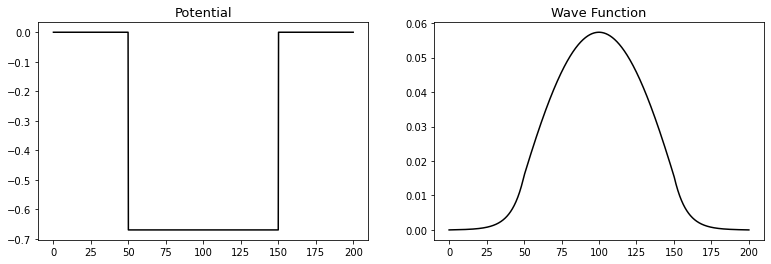

In [8]:
f, (ax1, ax2) = subplots(1, 2,figsize=(13,4))
ax1.set_title("Potential",size=13)
ax1.plot(x,V,'k')

ax2.set_title("Wave Function",size=13)
ax2.plot(x,state[:,0],'k')